In [1]:
import sys
!{sys.executable} pip install --upgrade pip
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus

/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.7/Resources/Python.app/Contents/MacOS/Python: can't open file 'pip': [Errno 2] No such file or directory
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [5]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
# !{sys.executable} -m pip install copy
import copy
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [7]:
obj_df.isnull().values.sum()

620

In [8]:
obj_df.isnull().sum()

director_name      104
actor_2_name        13
genres               0
actor_1_name         7
movie_title          0
actor_3_name        23
plot_keywords      153
movie_imdb_link      0
language            12
country              5
content_rating     303
dtype: int64

In [9]:
num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
num_df.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
def visual(col):
    plt.figure(figsize=(12,5))
    sns.distplot(num_df[col],bins=50)
    plt.axvline(x=num_df[col].mean(), color='orange', label='mean')
    plt.axvline(x=num_df[col].median(), color='red', label='median')
    plt.axvline(x=num_df[col].mode()[0], color='green', label='mode')
    plt.legend()
    print(col)
    print('Mean : {}'.format(num_df[col].mean()))
    print('Median : {}'.format(num_df[col].median()))
    print('SD : {}'.format(np.std(num_df[col])))

num_critic_for_reviews
Mean : 140.1942719807731
Median : 110.0
SD : 121.58949757081432
duration
Mean : 107.2010739856802
Median : 103.0
SD : 25.19493497213073
director_facebook_likes
Mean : 686.5092123911724
Median : 49.0
SD : 2813.043784935624
actor_3_facebook_likes
Mean : 645.0097609561753
Median : 371.5
SD : 1664.8758793764252
actor_1_facebook_likes
Mean : 6560.04706115965
Median : 988.0
SD : 15019.267707666462
gross
Mean : 48468407.52680933
Median : 25517500.0
SD : 68444760.44287835
num_voted_users
Mean : 83668.16081697402
Median : 34359.0
SD : 138471.52568136313
cast_total_facebook_likes
Mean : 9699.06385088241
Median : 3090.0
SD : 18161.99814252108
facenumber_in_poster
Mean : 1.3711729622266402
Median : 1.0
SD : 2.013375753394885
num_user_for_reviews
Mean : 272.77080844285143
Median : 156.0
SD : 377.9452509875336
budget
Mean : 39752620.436387606
Median : 20000000.0
SD : 206092252.19267717
title_year
Mean : 2002.4705167173252
Median : 2005.0
SD : 12.473334964769348
actor_2_faceboo

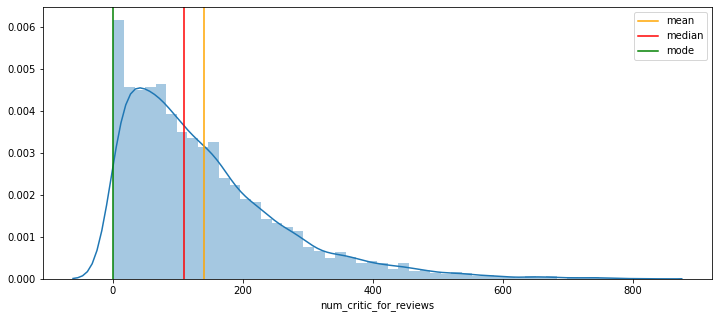

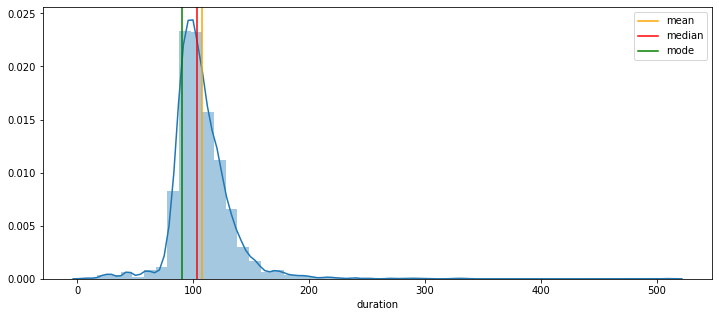

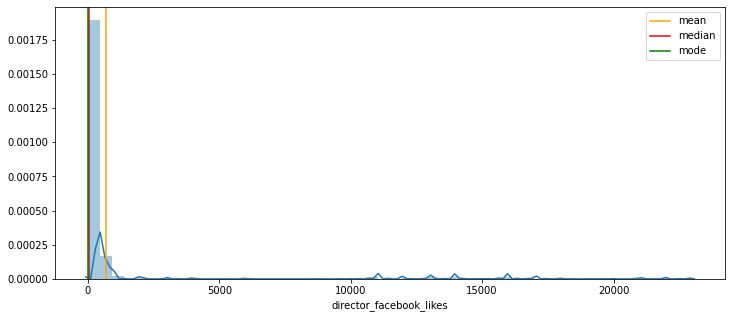

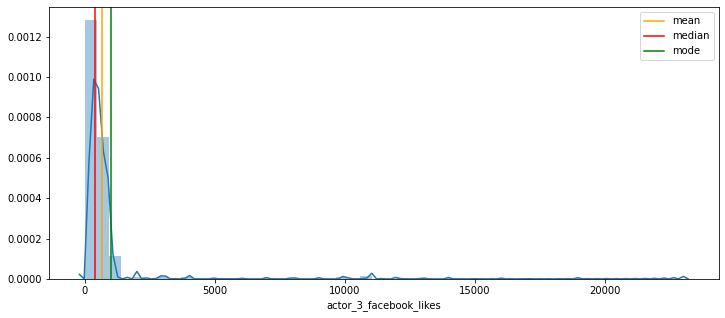

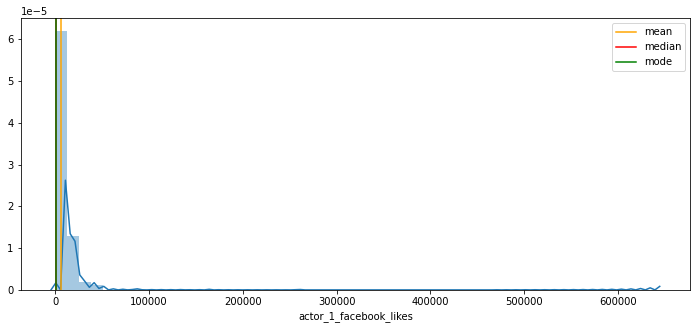

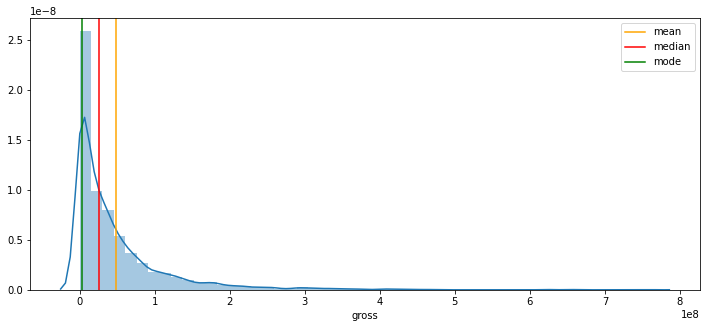

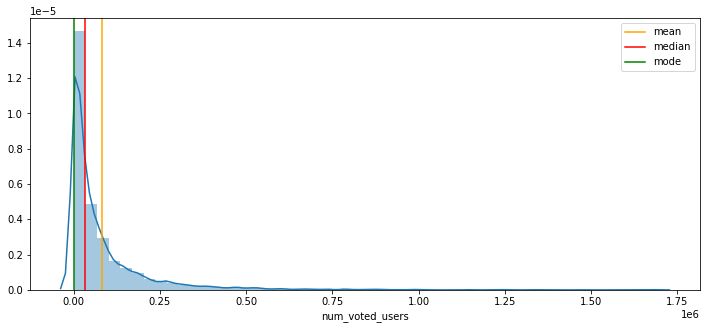

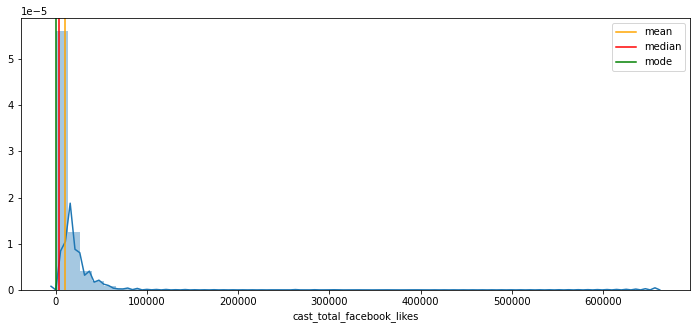

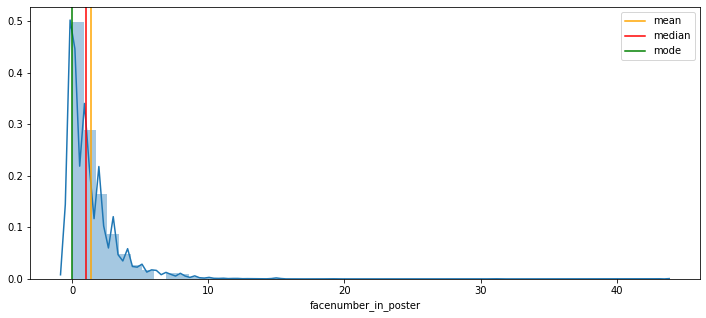

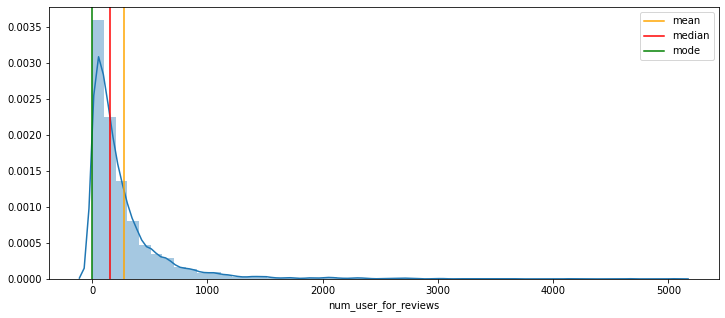

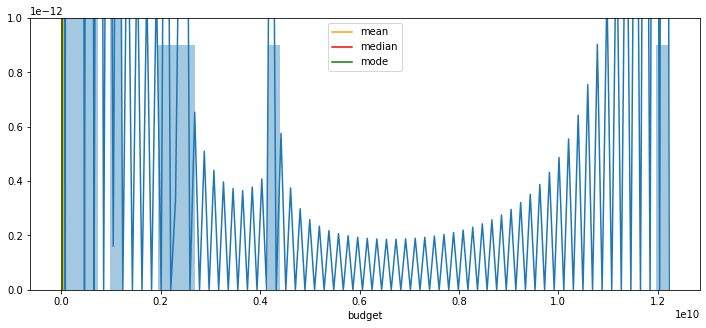

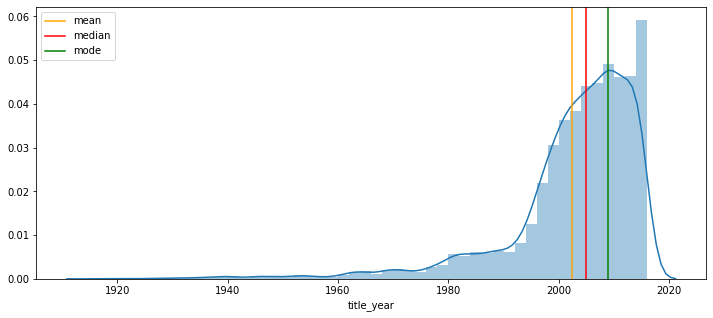

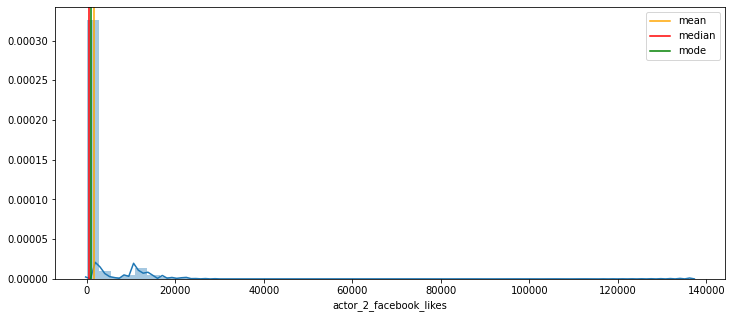

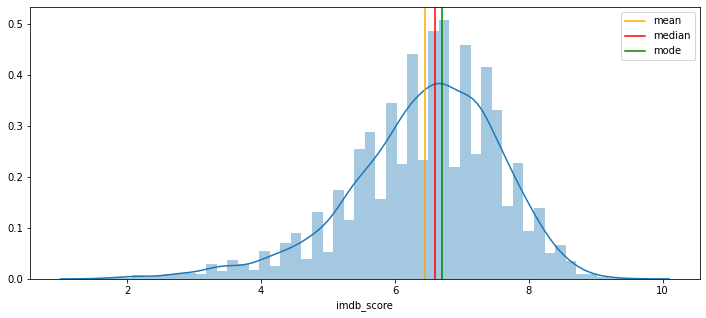

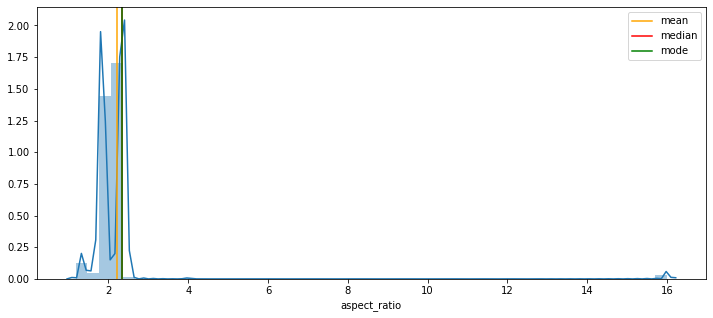

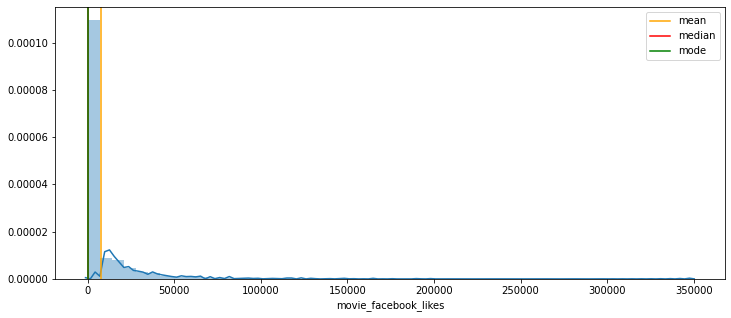

In [12]:
for col in num_df.columns:
    visual(col)

In [13]:
num_df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [14]:
def boxplt(col):
    sns.boxplot(num_df[col])
    plt.axvline(num_df[col].mean(),color='orange',label='mean')
    plt.axvline(num_df[col].median(),color='r',label='median')
    plt.legend()

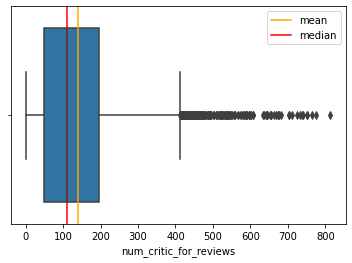

In [15]:
boxplt('num_critic_for_reviews')

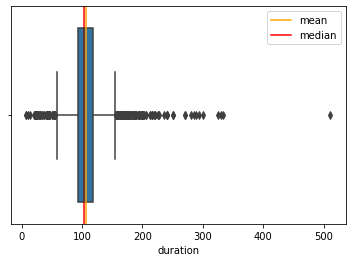

In [16]:
boxplt('duration')

In [17]:
num_df.drop(['gross','budget'],inplace=True,axis=1)

In [18]:
num_df['genres'] = df['genres']
num_df['plot_keywords'] = df['plot_keywords']

In [19]:
num_df['duration'].fillna(df['duration'].median(),inplace=True)
num_df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(),inplace=True)

In [20]:
num_df.isnull().sum()

num_critic_for_reviews         0
duration                       0
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
genres                         0
plot_keywords                153
dtype: int64

In [21]:
num_df['facenumber_in_poster'].fillna(num_df['facenumber_in_poster'].mean(),inplace=True)

In [22]:
num_df.fillna(method='ffill',inplace=True)

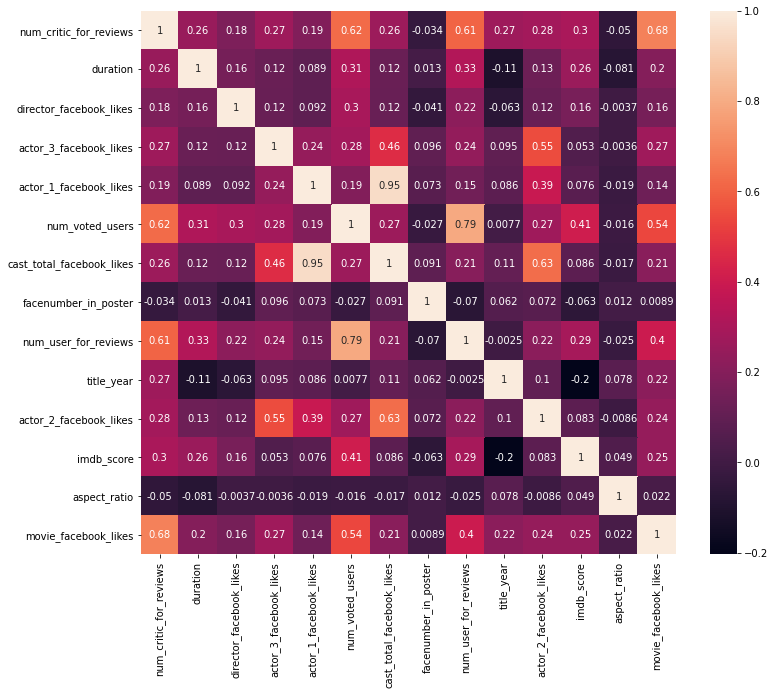

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(),annot=True)


imdb_score
Mean : 6.442137616498116
Median : 6.6
SD : 1.125004307964885


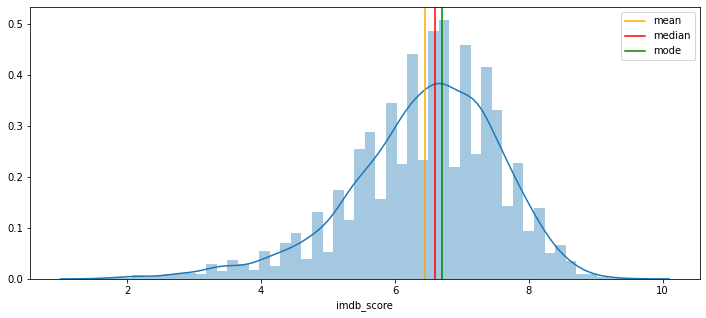

In [24]:
visual('imdb_score')

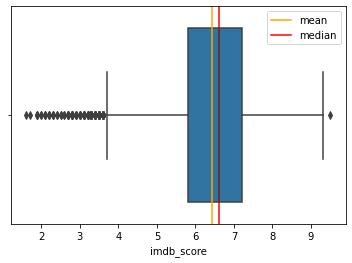

In [25]:
boxplt('imdb_score')

In [26]:
print((num_df['imdb_score'][(df.imdb_score > 6) & (df.imdb_score < 7)].count()/df['imdb_score'].count()))

0.33313503866745986


In [27]:
def isScoreHigh(score):
    if score>7:
        return 1
    elif score>6:
        return np.NaN
    else:
        return 0

In [28]:
num_df['is_score_high']=num_df['imdb_score'].apply(isScoreHigh)
num_df[['is_score_high','imdb_score']].describe()

,is_score_high,imdb_score
count,3179.000000,5043.000000
mean,0.501416,6.442138
std,0.500077,1.125116
min,0.000000,1.600000
25%,0.000000,5.800000
50%,1.000000,6.600000
75%,1.000000,7.200000
max,1.000000,9.500000


In [29]:
use_df = num_df.copy()
use_df.drop(['imdb_score'],inplace=True,axis=1)

In [30]:
use_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,genres,plot_keywords,is_score_high
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,936.0,1.78,33000,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,1.0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,5000.0,2.35,0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,1.0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,393.0,2.35,85000,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,NaN
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,23000.0,2.35,164000,Action|Thriller,deception|imprisonment|lawlessness|police offi...,1.0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,12.0,2.35,0,Documentary,deception|imprisonment|lawlessness|police offi...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.0,2.0,318.0,637.0,629,2283,2.0,6.0,2013.0,470.0,1.37,84,Comedy|Drama,fraud|postal worker|prison|theft|trial,1.0
5039,43.000000,43.0,2.0,319.0,841.0,73839,1753,1.0,359.0,2013.0,593.0,16.00,32000,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,1.0
5040,13.000000,76.0,0.0,0.0,0.0,38,0,0.0,3.0,2013.0,0.0,16.00,16,Drama|Horror|Thriller,cult|fbi|hideout|prison escape|serial killer,NaN
5041,14.000000,100.0,0.0,489.0,946.0,1255,2386,5.0,9.0,2012.0,719.0,2.35,660,Comedy|Drama|Romance,cult|fbi|hideout|prison escape|serial killer,NaN


In [31]:
num_df.drop(['genres','plot_keywords'],inplace=True,axis=1)
num_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_score_high
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,936.0,7.9,1.78,33000,1.0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,5000.0,7.1,2.35,0,1.0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,393.0,6.8,2.35,85000,NaN
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,23000.0,8.5,2.35,164000,1.0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,12.0,7.1,2.35,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.0,2.0,318.0,637.0,629,2283,2.0,6.0,2013.0,470.0,7.7,1.37,84,1.0
5039,43.000000,43.0,2.0,319.0,841.0,73839,1753,1.0,359.0,2013.0,593.0,7.5,16.00,32000,1.0
5040,13.000000,76.0,0.0,0.0,0.0,38,0,0.0,3.0,2013.0,0.0,6.3,16.00,16,NaN
5041,14.000000,100.0,0.0,489.0,946.0,1255,2386,5.0,9.0,2012.0,719.0,6.3,2.35,660,NaN


In [32]:
use_df.isnull().sum()

num_critic_for_reviews          0
duration                        0
director_facebook_likes         0
actor_3_facebook_likes          0
actor_1_facebook_likes          0
num_voted_users                 0
cast_total_facebook_likes       0
facenumber_in_poster            0
num_user_for_reviews            0
title_year                      0
actor_2_facebook_likes          0
aspect_ratio                    0
movie_facebook_likes            0
genres                          0
plot_keywords                   0
is_score_high                1864
dtype: int64

# Genres

In [33]:
def extract(x):
    x=x.split("|")
    for i in x:
        genres.add(i)

In [34]:
genres=set()
use_df['genres'].apply(extract)

0       None
1       None
2       None
3       None
4       None
        ... 
5038    None
5039    None
5040    None
5041    None
5042    None
Name: genres, Length: 5043, dtype: object

In [35]:
genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [36]:
def separate(x,t):
    x=x.split("|")
    for i in x:
        if i==t:
            return 1
    return 0

In [37]:
for t in genres:
    use_df[t]=use_df['genres'].apply(lambda x:separate(x,t))

In [38]:
use_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,...,Game-Show,History,Comedy,Sport,War,Film-Noir,Sci-Fi,Fantasy,Thriller,Reality-TV
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,...,0,0,0,0,0,0,1,1,0,0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,...,0,0,0,0,0,0,0,1,0,0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,1,0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.0,2.0,318.0,637.0,629,2283,2.0,6.0,2013.0,...,0,0,1,0,0,0,0,0,0,0
5039,43.000000,43.0,2.0,319.0,841.0,73839,1753,1.0,359.0,2013.0,...,0,0,0,0,0,0,0,0,1,0
5040,13.000000,76.0,0.0,0.0,0.0,38,0,0.0,3.0,2013.0,...,0,0,0,0,0,0,0,0,1,0
5041,14.000000,100.0,0.0,489.0,946.0,1255,2386,5.0,9.0,2012.0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
use_df.drop(['genres'],inplace=True,axis=1)

In [40]:
df_with_genres = use_df.copy()

In [41]:
df_with_genres.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,...,Game-Show,History,Comedy,Sport,War,Film-Noir,Sci-Fi,Fantasy,Thriller,Reality-TV
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,...,0,0,0,0,0,0,1,1,0,0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,...,0,0,0,0,0,0,0,1,0,0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,1,0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,0,0


# Plot Keywords

In [42]:
def extract(x):
    x=x.split("|")
    for i in x:
        plot_keywords.add(i)

In [43]:
plot_keywords = set()
use_df['plot_keywords'].apply(extract)

0       None
1       None
2       None
3       None
4       None
        ... 
5038    None
5039    None
5040    None
5041    None
5042    None
Name: plot_keywords, Length: 5043, dtype: object

In [44]:
plot_keywords

{'dance contest',
 'sister sister relationship',
 'teen angst',
 'trapped in space',
 'step dancing',
 'obese',
 'supernatural ability',
 '1950s',
 '17th century',
 'nesting grounds',
 'videotape',
 'smear campaign',
 'alligator',
 'massage therapist',
 'homicide',
 'keys',
 'bank heist',
 'sexism',
 'overhearing',
 'food',
 'lip gloss',
 'fountain of youth',
 'wolf cub',
 'mexican american',
 'ups',
 'tycoon',
 'shot in the heart',
 'reference to christy turlington',
 'gross out humor',
 'flirting',
 'razorfish',
 'white panties',
 'repossession',
 'death of wife',
 'singing',
 'unrequited love',
 'track and field',
 'fellatio',
 'miser',
 'rhedosaurus',
 'standing up to father',
 'skeleton soldier',
 'sales pitch',
 'merger',
 'government conspiracy',
 'blind date',
 '21st century',
 'fixer',
 'jogging',
 'wounded soldier',
 'mugger',
 'housekeeper',
 'combat',
 "rock 'n' roll",
 'dying words',
 'reading',
 'dead body wrapped in carpet',
 'based on article',
 'tyranny',
 'tombstone a

In [45]:
use_df.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes', 'plot_keywords',
       'is_score_high', 'Family', 'Horror', 'Crime', 'News', 'Western',
       'Adventure', 'Documentary', 'Action', 'Musical', 'Short', 'Biography',
       'Romance', 'Drama', 'Mystery', 'Music', 'Animation', 'Game-Show',
       'History', 'Comedy', 'Sport', 'War', 'Film-Noir', 'Sci-Fi', 'Fantasy',
       'Thriller', 'Reality-TV'],
      dtype='object')

In [46]:
for t in plot_keywords:
    use_df[t]=use_df['plot_keywords'].apply(lambda x:separate(x,t))

In [47]:
use_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,...,based on web series,estate,reference to jesus christ,retrograde narrative,futuristic city,interpol,haunted,female surfer,film starts with text,bachelor party
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,...,0,0,0,0,0,0,0,0,0,0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.0,2.0,318.0,637.0,629,2283,2.0,6.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
5039,43.000000,43.0,2.0,319.0,841.0,73839,1753,1.0,359.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
5040,13.000000,76.0,0.0,0.0,0.0,38,0,0.0,3.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
5041,14.000000,100.0,0.0,489.0,946.0,1255,2386,5.0,9.0,2012.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
for i in use_df.columns:
    print(i)

num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_1_facebook_likes
num_voted_users
cast_total_facebook_likes
facenumber_in_poster
num_user_for_reviews
title_year
actor_2_facebook_likes
aspect_ratio
movie_facebook_likes
plot_keywords
is_score_high
Family
Horror
Crime
News
Western
Adventure
Documentary
Action
Musical
Short
Biography
Romance
Drama
Mystery
Music
Animation
Game-Show
History
Comedy
Sport
War
Film-Noir
Sci-Fi
Fantasy
Thriller
Reality-TV
dance contest
sister sister relationship
teen angst
trapped in space
step dancing
obese
supernatural ability
1950s
17th century
nesting grounds
videotape
smear campaign
alligator
massage therapist
homicide
keys
bank heist
sexism
overhearing
food
lip gloss
fountain of youth
wolf cub
mexican american
ups
tycoon
shot in the heart
reference to christy turlington
gross out humor
flirting
razorfish
white panties
repossession
death of wife
singing
unrequited love
track and field
fellatio
miser
rhedosaurus
standing u

sports violence
silent hill
genghis khan
young version of character
dick tracy
first daughter
hammer
intimate partner homicide
astoria
prophecy
trapped in a mine
stabbing
u boat
bedroom
title spoken by character
bangladesh
flying through a thunderstorm
gay friend
housemaid
caught in a net
bdsm
deal
immigration
espionage
aurora borealis
forest
cold war era
imaginary son
diminution
peeping tom
1000000 b.c.
self esteem
band aid
real twins playing twins
closed ecological system
latin america
closeted lesbian
godzilla
warehouse
summer job
ancient greece
squire
snowed in
coffee shop
slacker
christian film
hitchhiker
finger gun
haunted house
carnival
amazon
drawing
boob job
spring break
turkey the bird
classic literature
allies
boot camp
safe deposit
black and white
nazism
movie star
resort town
jockey
amateur film
portal
golf
spying
leg spreading
teleportation
american expatriate
ulcer
vampire society
outrage
statutory rape
lake town
hot dog bun
tree house
capri
lift skirt
jeans
antidote
unl

yogi bear
convict
gift
starts with narration
girl fight
thanksgiving
vice president
beard
stalking
nonlinear timeline
park ranger
spleen
adopted daughter
space station
vomiting on someone
next door neighbor
italian
narcolepsy
collar
scissors
native american reservation
depression
street shootout
haunting
misfiring gun
adultery
hair
social outcast
athletic training
written by director
collapsing tunnel
soccer coach
acronym in title
pittsburgh steelers
defense lawyer
client
mosque
woman in bathtub
casual sex
teacher inspires students
dc comics
state in title
college professor
west ham supporter
parachute
meaning of life
punching a heavy bag
con man
star trek
actor playing multiple roles
device
grandmother's house
canadian armed forces
masquerade party
abu dhabi
kidnapper
villain
tejano
nightclub singer
detective inspector
violent behavior
bolivia
lawlessness
troubled production
route 66
amputee
hanging from a rope
separation
heir
sexual predator
sex with student
journal
negotiation
undre

alone
born in vitro
computer screen
battle of the sexes
florida keys
blockade
three women
former child star
nuclear war
sea
groupie
fire breathing dragon
physical flexability
canada
bathhouse
postal worker
river
class differences
jason voorhees
nickname
fan
grimdark
plate
apology
undercover agent
turn of the century
phallic image
adult child friendship
reference to randolph scott
jail
year 1983
love at first sight
undercover cop
major
laser
demo tape
rug
reference to george clooney
accidental death
club
mafioso
sex slavery
critic
capital management
aristocrat
independence day
heroine
mascot
shrinking potion
traitor
business card
practical joke
birthday
heart
chorus girl
rubble
doggystyle sex
daughter
blade the character
change
separated parents
auction
theatre director
gremlin
lake
mind uploading
hostage negotiator
drug abuse
pawn
black panties
jujitsu
spider
card dealer
pig mask
23 year time span
taunt
domino
kindred spirit
peugeot 206
evil queen
actor name in title
racial profiling
1

conflicted hero
wealth
dental assistant
world domination
post civil war
refusing to eat
poseidon
han river
rule
sphinx
brother in law
christmas spirit
belfast northern ireland
genie
product
newscaster
garbage can
new neighbor
female nudity
japanese military
indian restaurant
movie studio
machismo
based on ed gein
music score composed by director
written and directed by cast member
cheating
college athlete
glass of water
voyager golden record
dragon
human alien
falling in love
serial rapist
male pubic hair
portland oregon
medal
pope
blood vomiting
sphere
vampire hunter
fear
showdown
diving
slave revolt
tv journalism
fairy godmother
thor
pimp
workhouse
sesame street
snowy landscape
harlem manhattan new york city
blindfold
african american
geologist
satanic cult
terrorism
connecticut
after dark horrorfest
train
totalitarian
dignity
police officer killed
chocolate
1810s
false promise of the american dream
barbed wire fence
tv
sikh
pep talk
survival rate
13 year olds
cave
pigalle
bed
dead b

reference to vanilla ice
dentist
idaho
wild mustang
sick child
ring
woodchipper
crime spree
cold fusion
mob hit
survivor
song and dance
clone
fictional reality show
u.s. civil war
soul
year 2047
electrocuted in bathtub
murder weapon
grateful dead
ghost hunter
female bodybuilder
gilbert and sullivan's princess ida
summer
south asian
terrorist cell
bus stop
wallet
paranormal research
serbian
based on a book
sorority house
starlet
priest
school teacher
ragtime
pianist
telephone
madagascar
student government
drive in classic
cattle drive
employer employee relationship
contortionist
nightclub
cigarette lighter
thatcher
dracula
old couple
obsessed fan
novelist
pipeworks
james bond
media tycoon
leopard
missing file
thomas jefferson
presidential candidate
fictional talk show
school presentation
la llorona
boxer
norwegian
leather dress
comet
houseguest
greed
heroic military
school janitor
no title at beginning
scottish
rodeo cowboy
monkey
arcade
falling out among thieves
science experiment
emer

elvis presley
barricading a door
pakistani
u.s. army
mother in law
marine biologist
prosthetics
place name in title
british prime minister
small village
muppet
cartographer
reference to friedrich schiller
bedtime story
washington square manhattan new york city
boyfriend girlfriend relationship
ice hockey
the flintstones
wrongful conviction
police surveillance
bunker
twin brother and sister
poacher
life insurance policy
psychological torture
actual animal killed
university
warrior
con artist
traveling
homoerotic fight
grifter
alien infection
lds film
1860s
promiscuous woman
dead husband
sailing boat
chewing gum
cabin
pirate radio
underwater
best friend
talking cat
white russian
reference to mahmoud ahmedinejad
law enforcement
deer
mental breakdown
buenos aires argentina
talking on a rooftop
talking animal
tv reporter
self deception
non profit
thrown through a window
dead teenager
obese man
technology
racial tension
bank
jackass
racer
shy kid
loan shark
saxophonist
television set
skinny 

missing son
creature feature
yellow
saloon
bookstore
rare book
crying man
middle america
beijing
working class
fondling
telling someone to shut up
movie producer
hockey mask
you can say that again joke
seaside
pipeline
pakistan
short term memory loss
penthouse
dinosaur
miami florida
website
tooth knocked out
t.e. lawrence
fairy tale
materialism
high school dance
doll
loss of innocence
tv mini series
boat builder
gun running
master of disguise
funeral
blue light
u.s. congressman
loneliness
emaciation
wiley college
fictional government agency
missing
poker player
epic
unplanned pregnancy
ex con
cia agent
saved from hanging
macaw
nude with glasses
confession
ninja
equal pay
washing machine
texas hold 'em
pregnant with an alien fetus
wasp
plastic bubble
narnia
sneezing
prefect
bull riding
ethnic warfare
demonic possession
rearview mirror
hometown hero
card counting
belching
dead woman with eyes open
karma
banishment
exploding helicopter
martial arts school
based on opera
symbol
legend
sadi

In [49]:
use_df.drop(['plot_keywords'],inplace=True,axis=1)

In [50]:
use_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,...,based on web series,estate,reference to jesus christ,retrograde narrative,futuristic city,interpol,haunted,female surfer,film starts with text,bachelor party
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,...,0,0,0,0,0,0,0,0,0,0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.0,2.0,318.0,637.0,629,2283,2.0,6.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
5039,43.000000,43.0,2.0,319.0,841.0,73839,1753,1.0,359.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
5040,13.000000,76.0,0.0,0.0,0.0,38,0,0.0,3.0,2013.0,...,0,0,0,0,0,0,0,0,0,0
5041,14.000000,100.0,0.0,489.0,946.0,1255,2386,5.0,9.0,2012.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
num_df.isnull().sum()

num_critic_for_reviews          0
duration                        0
director_facebook_likes         0
actor_3_facebook_likes          0
actor_1_facebook_likes          0
num_voted_users                 0
cast_total_facebook_likes       0
facenumber_in_poster            0
num_user_for_reviews            0
title_year                      0
actor_2_facebook_likes          0
imdb_score                      0
aspect_ratio                    0
movie_facebook_likes            0
is_score_high                1864
dtype: int64

# Decision Tree Training

## Num Cols

In [82]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix

X = num_df.dropna().drop(['is_score_high','imdb_score'],axis=1)
y = num_df['is_score_high'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [83]:
print (classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73       473
         1.0       0.73      0.75      0.74       481

    accuracy                           0.74       954
   macro avg       0.74      0.74      0.74       954
weighted avg       0.74      0.74      0.74       954

[[340 133]
 [119 362]]


In [84]:
num_df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,is_score_high
0,723.000000,178.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,2009.0,936.0,7.9,1.78,33000,1.0
1,302.000000,169.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,2007.0,5000.0,7.1,2.35,0,1.0
2,602.000000,148.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,2015.0,393.0,6.8,2.35,85000,NaN
3,813.000000,164.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,2012.0,23000.0,8.5,2.35,164000,1.0
4,140.194272,103.0,131.0,23000.0,131.0,8,143,0.0,2701.0,2012.0,12.0,7.1,2.35,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.000000,87.0,2.0,318.0,637.0,629,2283,2.0,6.0,2013.0,470.0,7.7,1.37,84,1.0
5039,43.000000,43.0,2.0,319.0,841.0,73839,1753,1.0,359.0,2013.0,593.0,7.5,16.00,32000,1.0
5040,13.000000,76.0,0.0,0.0,0.0,38,0,0.0,3.0,2013.0,0.0,6.3,16.00,16,NaN
5041,14.000000,100.0,0.0,489.0,946.0,1255,2386,5.0,9.0,2012.0,719.0,6.3,2.35,660,NaN


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [86]:
model = LogisticRegression()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test);

In [87]:
print (classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.70      0.77       547
         1.0       0.67      0.82      0.74       407

    accuracy                           0.75       954
   macro avg       0.76      0.76      0.75       954
weighted avg       0.77      0.75      0.75       954

[[385 162]
 [ 74 333]]


## Num Cols with genres

In [88]:
X = df_with_genres.dropna().drop(['is_score_high','plot_keywords'],axis=1)
y = df_with_genres['is_score_high'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [89]:
print (classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       478
         1.0       0.80      0.83      0.82       476

    accuracy                           0.81       954
   macro avg       0.81      0.81      0.81       954
weighted avg       0.81      0.81      0.81       954

[[380  98]
 [ 79 397]]


In [90]:
model = LogisticRegression()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test);

In [91]:
print (classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       501
         1.0       0.82      0.90      0.86       453

    accuracy                           0.86       954
   macro avg       0.86      0.86      0.86       954
weighted avg       0.86      0.86      0.86       954

[[412  89]
 [ 47 406]]


## Num Cols with genres and plot keywords

In [92]:
X = use_df.dropna().drop(['is_score_high'],axis=1)
y = use_df['is_score_high'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [93]:
print (classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       473
         1.0       0.82      0.84      0.83       481

    accuracy                           0.82       954
   macro avg       0.82      0.82      0.82       954
weighted avg       0.82      0.82      0.82       954

[[382  91]
 [ 77 404]]


In [94]:
model = LogisticRegression()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
model.fit(X_train,y_train)
y_pred=model.predict(X_test);

In [95]:
print (classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       495
         1.0       0.81      0.88      0.84       459

    accuracy                           0.84       954
   macro avg       0.85      0.85      0.84       954
weighted avg       0.85      0.84      0.84       954

[[403  92]
 [ 56 403]]


# Logistic Regression

## Num Cols

In [97]:
df['plot_keywords']

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
                              ...                        
5038               fraud|postal worker|prison|theft|trial
5039         cult|fbi|hideout|prison escape|serial killer
5040                                                  NaN
5041                                                  NaN
5042    actress name in title|crush|date|four word tit...
Name: plot_keywords, Length: 5043, dtype: object